Let $D = \{(x_i, y_i)\}_{i=1}^N$ be a training dataset. The goal is to train a linear classifier in a form of $y(x) = sign(x^Tw + b)$

## SVM with soft-margins
__Primal problem__

$$ \min_{\xi_i, w, b} \sum_{i=1}^N \xi_i + C\|w\|_2^2$$
$$\text{s.t.} ~~~~ y_i (x_i^Tw + b) \geq 1 - \xi_i$$
$$ \xi_i \geq 0 $$

Lets rewrite the conditions on $\xi_i$:
$$
\begin{cases}
\xi_i \geq& 1 - y_i (x_i^Tw + b) \\
\xi_i \geq& 0
\end{cases}
$$
taking into account this conditions and the fact that in the objective we want to minimize $\xi_i$ we may conclude that:

$$\xi_i = \max(0, 1 - y_i (x_i^Tw + b))$$

And the optimization problem can be formulated as follows:

$$ \min_{\xi_i, w, b} \sum_{i=1}^N \max(0, 1 - y_i (x_i^Tw + b)) + C\|w\|_2^2$$



## Logistic Regression

In logistic regression we model the $p(y=+1|x)$ via linear function and sigmoid:
$$ p(y=+1|x) = y(x) = \sigma(x^Tw + b) = \dfrac{1}{1 + e^{-(x^Tw + b)}} $$

To find the parameters $w, b$ we follow maximum-likelihood approach, and the optimization problem is the following:

$$ \max_{w, b} \sum_{i=1}^N [y_i = +1]\log(\sigma(x^Tw + b)) + [y_i = -1]\log(1 - \sigma(x^Tw + b)) $$


In [1]:
from cvxpysvm import SVM, LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style='whitegrid')
np.random.seed(0)

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
def plot_decision(clf, X, y, cmap='Set1'):    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, s=80, label='Training points')

    # Circle out the test data
    plt.scatter(X[clf.support, 0], X[clf.support, 1], s=200, facecolors='none',
                zorder=10, edgecolor='k', cmap=cmap, label='Support Vectors')

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    x_min -= 0.05 * np.abs(x_max - x_min)
    x_max += 0.05 * np.abs(x_max - x_min)
    y_min = X[:, 1].min() * 1.1
    y_max = X[:, 1].max() * 1.1
    y_min -= 0.05 * np.abs(y_max - y_min)
    y_max += 0.05 * np.abs(y_max - y_min)

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
#     plt.pcolormesh(XX, YY, Z > 0, cmap=cmap)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-1, 0, 1])
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.legend()

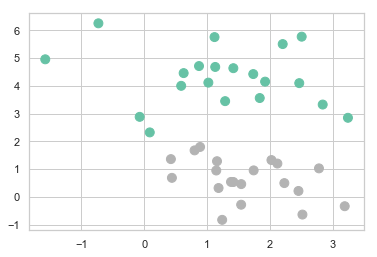

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=0, n_samples=40)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Set2', s=80)

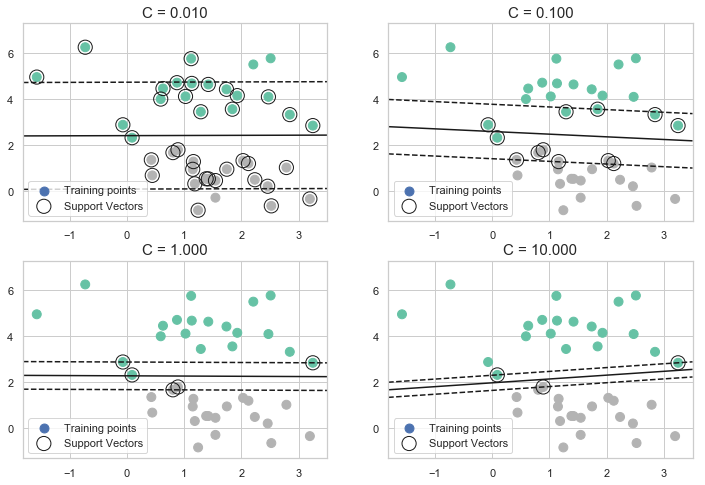

In [4]:
c_grid = np.logspace(-2, 1, 4)
plt.figure(figsize=(12, 8))

for (i, c) in enumerate(c_grid):
    clf = SVM(kernel='linear', C=c)
    clf.fit(X, y)
    plt.subplot(2, 2, i+1)
    plt.title('C = {:.3f}'.format(c), size=15)
    plot_decision(clf, X, y, cmap='Set2')

plt.savefig('linear_svm.png', dpi=300, bbox_inches='tight')

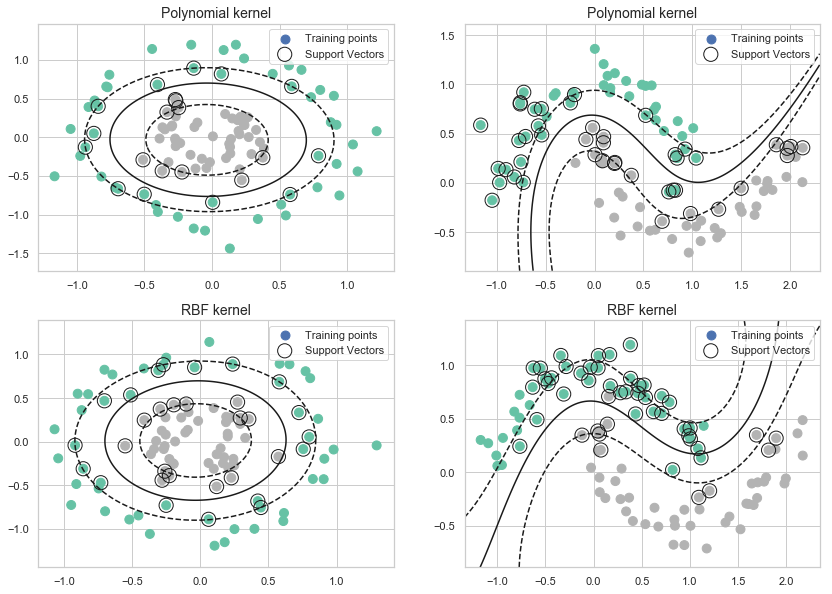

In [6]:
from sklearn.datasets import make_circles, make_moons

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
X, y = make_circles(noise=0.13, factor=0.3)
clf = SVM(kernel='poly', C=2)
clf.fit(X, y)
plot_decision(clf, X, y, cmap='Set2')
plt.title('Polynomial kernel', size=14)

plt.subplot(2, 2, 2)
X, y = make_moons(noise=0.13)
clf = SVM(kernel='poly', C=6)
clf.fit(X, y)
plot_decision(clf, X, y, cmap='Set2')
plt.title('Polynomial kernel', size=14)


plt.subplot(2, 2, 3)
X, y = make_circles(noise=0.13, factor=0.3)
clf = SVM(kernel='rbf', C=2)
clf.fit(X, y)
plot_decision(clf, X, y, cmap='Set2')
plt.title('RBF kernel', size=14)


plt.subplot(2, 2, 4)
X, y = make_moons(noise=0.13)
clf = SVM(kernel='rbf', C=6)
clf.fit(X, y)
plot_decision(clf, X, y, cmap='Set2')
plt.title('RBF kernel', size=14)

plt.savefig('kernel_svm.png', dpi=300, bbox_inches='tight')